In [119]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import io

In [121]:
fb_lines = []
with io.open('fbout.txt', 'r', encoding='UTF-16LE') as f:    
    start_read = False
    for line in f:
        if 'FRAME' in line and not start_read:
            start_read = True
        elif start_read:
            if "FRAME" in line:
                break
            fb_lines.append(line.strip().split(','))

colors = [l[-1] for l in fb_lines]
colors = ['111' if c == 'xxx' else c for c in colors]
colors = [int(c,2) for c in colors]
fb_lines = [[*l[:-1], colors[i]] for i, l in enumerate(fb_lines)]
fb_lines = [[int(l) for l in line] for line in fb_lines]
fb_lines = np.array(fb_lines, dtype=int)
fb_lines = np.reshape(fb_lines, (fb_lines[-1,1]+1, fb_lines[-1,0]+1, 6));
print(fb_lines.shape)
img = np.zeros((*fb_lines.shape[:-1], 3), dtype=int)
print(img.shape)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i, j] = [255 * int(x) for x in f'{fb_lines[i, j, -1]:03b}']
        
        if fb_lines[i, j, -3] == 0: # hsync
            img[i, j, 1] = 255
        if fb_lines[i, j, -2] == 0: # vsync
            img[i, j, 2] = 255
        
fig = plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.xlim((-0.5, img.shape[0]-0.5))
plt.ylim((img.shape[1]-0.5, -0.5))
plt.tight_layout()
plt.xticks(np.arange(0,img.shape[0],1))
plt.yticks(np.arange(0,img.shape[1],1))
plt.grid()
plt.axis('equal')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
## Verify display timing code

(53, 54, 6)
(53, 54, 3)


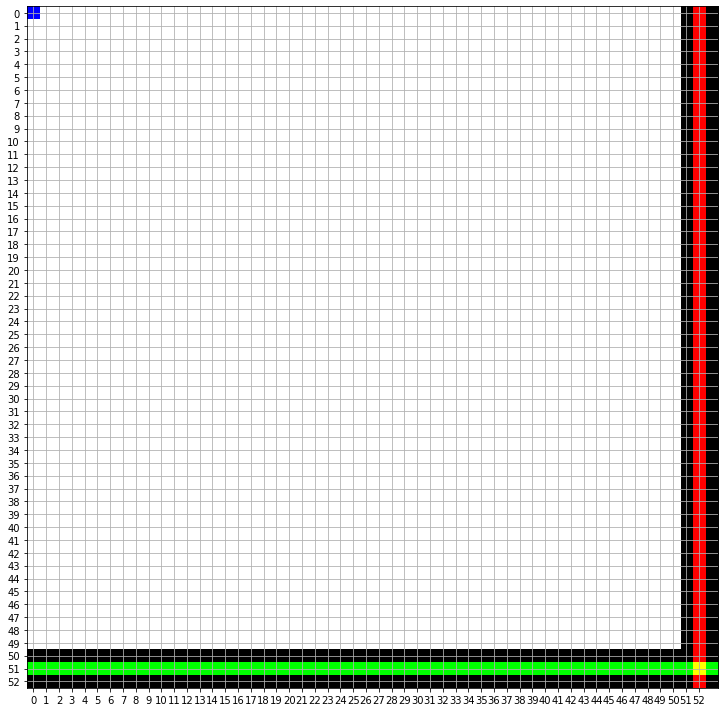

In [117]:
dt_lines = []
with io.open('dtout.txt', 'r', encoding='UTF-16LE') as f:    
    start_read = False
    for line in f:
        if 'V_BITW' in line:
            start_read = True
        elif start_read:
            if "FRAME" in line:
                break
            dt_lines.append(line.strip().split(','))
dt_lines = [[int(x) for x in l] for l in dt_lines]
dt_lines = np.array(dt_lines, dtype=int)
dt_lines = np.reshape(dt_lines, (dt_lines[-1,-1]+1, dt_lines[-1,-2]+1, -1))
print(dt_lines.shape)
img = np.zeros((*dt_lines.shape[:-1], 3), dtype=int)
print(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        frame, de, hs, vs, sx, sy = dt_lines[i, j]
        color = [0, 0, 0]
        if frame: # 
            color[2] = 255
        if de:
            if not frame:
                color = [255, 255, 255]
        if hs == 0: # draw hsync as red
            if frame: # if frame=1, dont use color since it is within frame
                color[0] = 0
            else:
                color[0] = 255
        if vs == 0: # draw vsync as blue
            if frame:
                color[1] = 0
            else:
                color[1] = 255

        img[i, j] = color
fig = plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.xlim((-0.5, img.shape[0]-0.5))
plt.ylim((img.shape[1]-0.5, -0.5))
plt.tight_layout()
plt.xticks(np.arange(0,img.shape[0],1))
plt.yticks(np.arange(0,img.shape[1],1))
plt.grid()
plt.axis('equal')
plt.show()